# Predicting level of fatalities in political violence and protest events in India
The Armed Conflict Location & Event Data Project (ACLED) is a disaggregated conflict collection, analysis and crisis mapping project.ACLED collects the dates, actors, types of violence, locations, and fatalities of all reported political violence and protest events. Political violence and protest includes events that occur within civil wars and periods of instability, public protest and regime breakdown. Data collected from India during the period of 26-January-2016 to 26-January-2019
#### source: https://www.acleddata.com/data/
*Raleigh, Clionadh, Andrew Linke, Håvard Hegre and Joakim Karlsen. (2010).“Introducing ACLED-Armed Conflict Location and Event Data.” Journal of PeaceResearch 47(5) 651-660.*

## Step 2. Data visualization

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Although it is not advisable but to keep this notebook clean and short, supress warnings 
# comment this when you want to see warnings
import warnings
warnings.filterwarnings("ignore")

#### Loading the cleaned up dataframe

In [6]:
data=pd.read_csv('Cleaned_fatalities_data.csv')

In [8]:
data.head()

,time_precision,inter1,inter2,geo_precision,fatalities,State_label,Event_label,month,No_of_actors,SourceCount,Source_scale1
0,1,1,8,2,0,0,0,38,3,1,1
1,1,3,1,2,1,0,1,38,2,2,1
2,1,5,0,2,0,0,2,38,1,1,2
3,1,5,0,2,0,0,2,38,1,1,2
4,1,5,1,1,0,1,2,38,4,1,3


### Distribution of number of Fatalities in protest and political violence events.

Text(0, 0.5, 'Frequency')

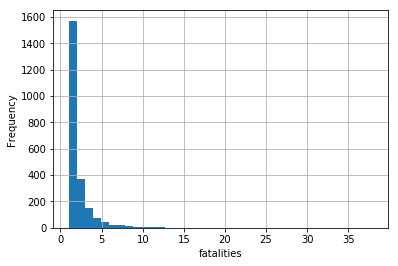

In [10]:
Hist=data.fatalities.hist(bins=max(data.fatalities),range=[1,max(data.fatalities)])
plt.xlabel('fatalities')
plt.ylabel('Frequency')

What we can see here that number of non-fatal events is significantly higher than fatal events. Also, events with >5 fatalities is even lower.

So, we create new feature called **'Fatality_Label'**.

0 for non-fatal event; 

1 for low fatality event (less than 5 fatalities)

2 for high fatality event (more than or equal to 5 fatalities)

In [13]:
def fatal_label(fatal_count):
    if fatal_count==0:
        return 0
    elif fatal_count>5:
        return 2
    else:
        return 1
data['Fatality_Label']=data.fatalities.apply(fatal_label)
data.drop(columns=['fatalities'],inplace=True)

Count of events with different fatality label to give us an idea about the **level of fatalities** in all events.

Text(0.5, 1.0, 'Distribution of Fatality Events')

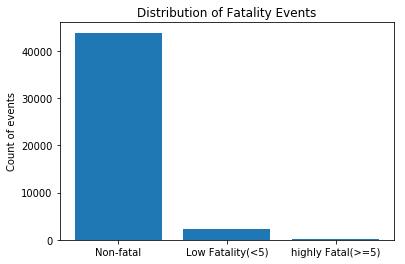

In [23]:
plt.bar(x=('Non-fatal','Low Fatality(<5)','highly Fatal(>=5)'),height=data['Fatality_Label'].value_counts())
plt.ylabel('Count of events')
plt.title('Distribution of Fatality Events')

### Month-wise Event distribution
Distribution of Events based on there Fatality level across all the **months** we are looking at,

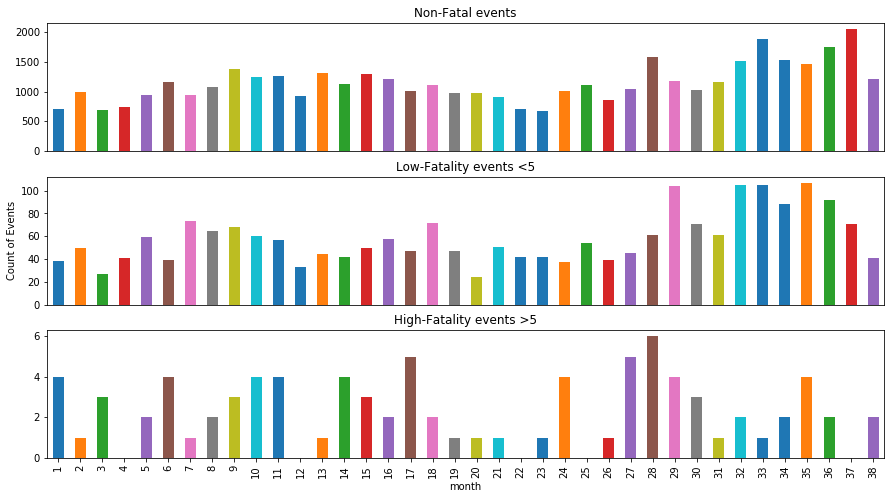

In [26]:
Month_hist=pd.crosstab(data.month,data.Fatality_Label)
fig, axs=plt.subplots(nrows=3, figsize=(15,8))
for i in range(3):
    Month_hist[i].plot.bar(ax=axs[i])
    if i==0:
        axs[i].set_title('Non-Fatal events') 
    elif i==1:
        axs[i].set_title('Low-Fatality events <5') 
        axs[i].set_ylabel('Count of Events')
    else:
        axs[i].set_title('High-Fatality events >5') 
    if i!=2:
        axs[i].get_xaxis().set_ticks([])
        axs[i].set_xlabel(None)

### State-wise Event distribution
Distribution of Events based on there Fatality level across all the **states** we are looking at,

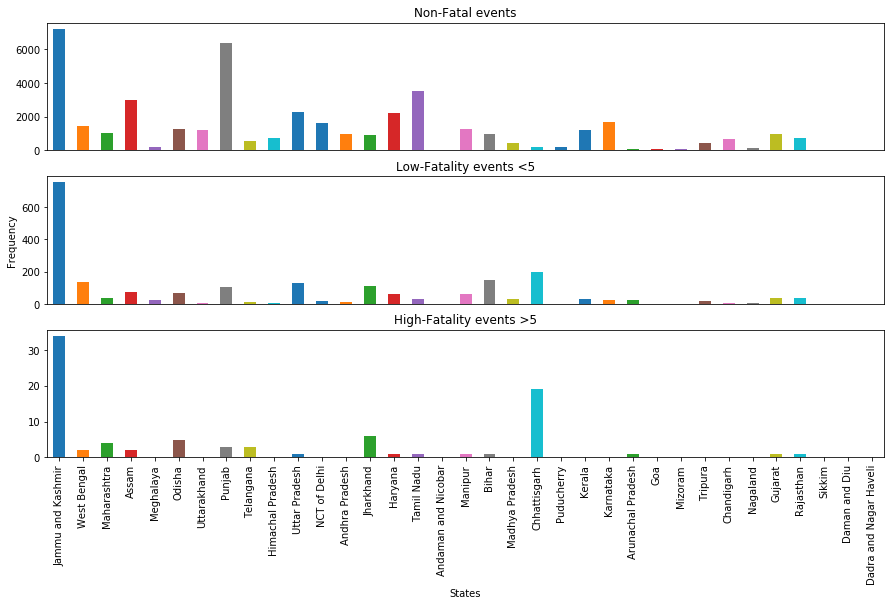

In [39]:
States=pd.read_csv('States.csv')
State_hist=pd.crosstab(data.State_label,data.Fatality_Label)
fig, axs=plt.subplots(nrows=3, figsize=(15,8))
for i in range(3):
    State_hist[i].plot.bar(ax=axs[i])
    if i==0:
        axs[i].set_title('Non-Fatal events') 
    elif i==1:
        axs[i].set_title('Low-Fatality events <5') 
        axs[i].set_ylabel('Frequency')
    else:
        axs[i].set_title('High-Fatality events >5')
        axs[i].set_xlabel('States')
    if i!=2:
        axs[i].get_xaxis().set_ticks([])
        axs[i].set_xlabel(None)
    else:
        axs[i].set_xticklabels(list(States.state))

### SourceScale-wise Event distribution
Distribution of Events based on there Fatality level across all the Source-scale we are looking at,

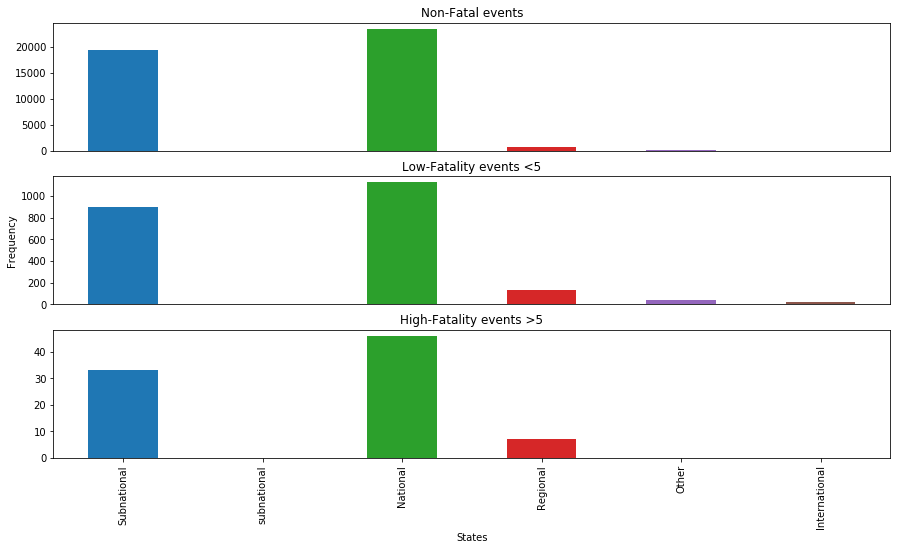

In [44]:
SourceScale=pd.read_csv('Source_Scale.csv')
SScale_hist=pd.crosstab(data.Source_scale1,data.Fatality_Label)
fig, axs=plt.subplots(nrows=3, figsize=(15,8))
for i in range(3):
    SScale_hist[i].plot.bar(ax=axs[i])
    if i==0:
        axs[i].set_title('Non-Fatal events') 
    elif i==1:
        axs[i].set_title('Low-Fatality events <5') 
        axs[i].set_ylabel('Frequency')
    else:
        axs[i].set_title('High-Fatality events >5')
        axs[i].set_xlabel('States')
    if i!=2:
        axs[i].get_xaxis().set_ticks([])
        axs[i].set_xlabel(None)
    else:
        axs[i].set_xticklabels(list(SourceScale.source_scale))

### Distribution of interaction between two actors involved in the event based on the Fatality level

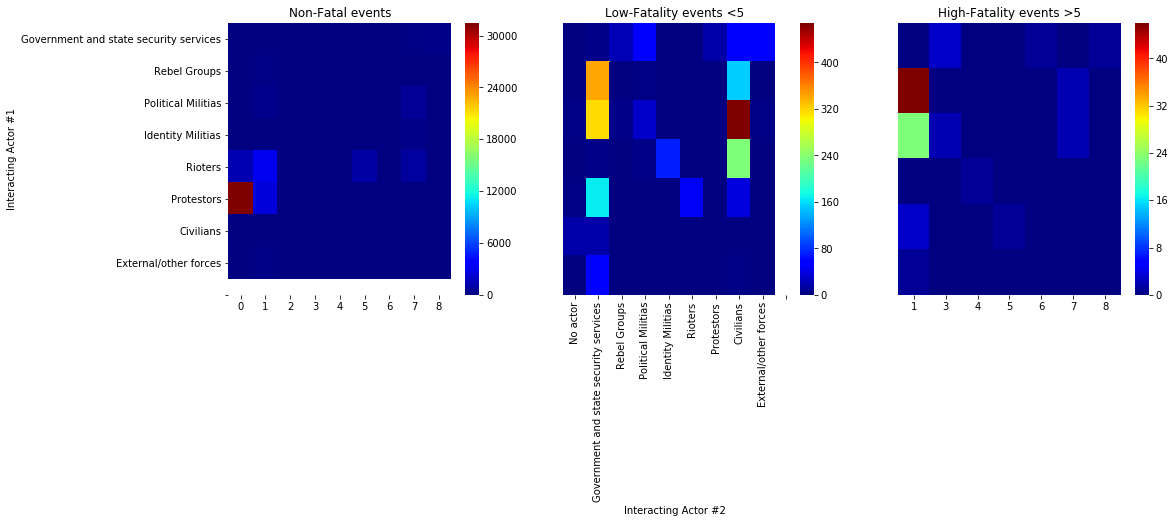

In [42]:
inter_codes=pd.read_csv('Inter_codes.csv')
fig, axs=plt.subplots(ncols=3, figsize=(17,5))
for i in range(3):
    plt.subplot(131+i)
    Inter1_2=data.loc[data.Fatality_Label==i,['inter1','inter2']]
    sns.heatmap(pd.crosstab(Inter1_2.inter1,Inter1_2.inter2),cmap='jet')
    if i==0:
        plt.title('Non-Fatal events') 
        plt.ylabel('Interacting Actor #1')
        plt.xlabel('')
        plt.yticks(np.arange(0.5,9.5),list(inter_codes.description)[1:],rotation='horizontal')
        #plt.xticks(np.arange(9),list(inter_codes.description),rotation='vertical')
    elif i==1:
        plt.title('Low-Fatality events <5') 
        plt.xlabel('Interacting Actor #2')
        plt.ylabel('')
        plt.yticks([])
        plt.xticks(np.arange(0.5,10.5),list(inter_codes.description),rotation='vertical')
    else:
        plt.title('High-Fatality events >5')
        plt.xlabel('')
        plt.ylabel('')
        plt.yticks([])
        #plt.xticks(np.arange(9),list(inter_codes.description),rotation='vertical')

In [47]:
data.to_csv('Cleaned_fatalities_data2.csv',index=False)